In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from scipy.signal import find_peaks
import pims, sys
from skimage.transform import rotate
from pathlib import Path
from scipy.signal import savgol_filter
sys.path.insert(0, r'C:\\Warwick\\Jerko_Code_And_Docs\\Manuscript Code')
from Filament_Analysis.geometric_2 import SimpleSpline


<blockquote>1. Load the image series, the filament axis (or axes) and visualise.</blockquote>

In [2]:
# Stack and file paths, here we have two stacks that will be combined later.
base_path = Path(r'C:\Users\jrosk\Dropbox\Warwick\TIRF\February_2023\22-02-2023\Untreated_Sample')

filepath_0 = base_path.joinpath(r'Slides\Slide_1\22-Feb-23_tirf-17.tif')


# This is to crop the stack, so that we only have the red channel
@pims.pipeline
def crop_image(frame):
    return rotate(frame,90, preserve_range=True, resize=True)[0:428]

full_roi_stack_0 = pims.open(filepath_0.as_posix())

# Apply pipeline
images_0 = crop_image(full_roi_stack_0)

plt.imshow(images_0[1])


In [3]:
from Image_Analysis.Filament_Analysis.various_funcs import niblack_threshold

In [4]:
# approach 2
framenums = [n for n in range(0, len(images_0)) if n%50 == 0]
avg_img = np.zeros_like(images_0[0], dtype=np.uint16)
for n in framenums:
    avg_img = avg_img + niblack_threshold(images_0[n],blob_size_thr = 1000)
#avg_img = avg_img / len(framenums)

plt.imshow(avg_img)

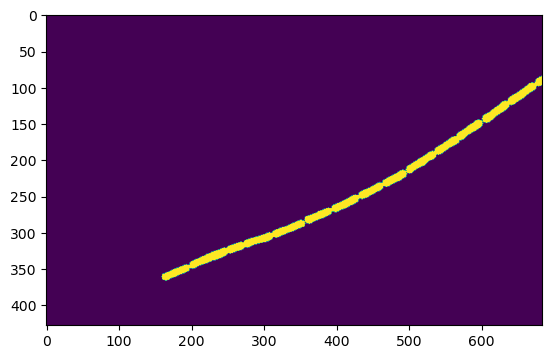

In [5]:
second_way = niblack_threshold(images_0[1000],blob_size_thr = 1000, window_size=21, k=0.3)
plt.imshow(second_way)

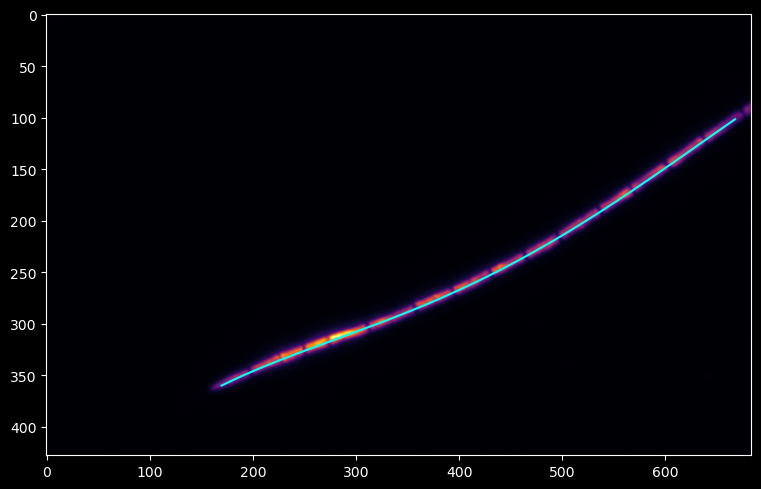

In [6]:
filament_axis = SimpleSpline.from_binary_image(dx=0.01,input_image=second_way > 0, spline_k = 5)

#Sometimes the spline goes beyond the image dimensions and causes issues
filament_axis.crop_to_image_dimensions(images_0[0].shape)


# Visualise the spline
with plt.style.context('dark_background'):
    fig , ax = plt.subplots(1,1, figsize=(8,5))

    ax.imshow(images_0[1000], cmap='inferno')
    ax.plot(filament_axis.xy[500:-1500,0], filament_axis.xy[500:-1500:,1], color='cyan')
    
    plt.tight_layout()
    plt.show()

In [7]:
np.savetxt(Path(r'splines/spline_0.txt'),filament_axis.xy,delimiter = ',')